<a href="https://colab.research.google.com/github/kdduha/cs102/blob/master/homework06/%D0%97%D0%B0%D1%89%D0%B8%D1%82%D0%B0_%D0%9B%D0%A03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
from random import choice
pd.set_option('display.max_columns', None)



Воспользуемся стандартным датасетом `titanic`. Загрузим его из модуля `seaborn`. Источник данных: https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv

In [2]:
data = sns.load_dataset("titanic") # загружаем датасет
data.head() # выводим первые 5 строк

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Номер варианта – ваш номер в списке группы в ИСУ.

In [3]:
pd.DataFrame([[choice(range(1,6)), choice(range(1,6))] for _ in range(26)], columns=["Задание 1", "Задание 2"]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Задание 1,2,3,3,4,1,5,5,4,5,2,5,4,5,1,2,5,2,3,2,5,5,5,3,5,4,3
Задание 2,4,4,4,4,4,1,4,5,1,1,5,1,1,2,5,1,4,1,3,4,4,2,1,1,1,1


## Задание 1 (согласно варианту)

1. Сколько **детей** из города **Southampton**, занимавших каюту в **третьем классе**, **выжили**? Выведите строки таблицы, удовлетворяющие условию. Найдите средний возраст (медиану) девочек.

In [ ]:
# PUT YOUR CODE HERE

2. Кого среди **выживших**, занимавших каюту на палубе **B**, больше: мужчин, женщин или детей? Во сколько раз больше?

In [46]:
pas_B = data[(data['deck'] == 'B') & (data['alive'] == 'yes')]

who_count = pd.DataFrame({'man' : len(pas_B[pas_B['who'] == 'man']), 
                          'woman' : len(pas_B[pas_B['who'] == 'woman']), 
                          'children' : len(pas_B[pas_B['who'] == 'child'])}, index=[0])

mx, mn = max(who_count), min(who_count)
mean = ''.join(set(who_count.columns) - set([mx, mn]))

print(f'Больше всего {mx} : их {who_count[mx][0]}. Это в {round(who_count[mx][0] / who_count[mn][0], 2)} раз больше чем {mn} и в {round(who_count[mx][0] / who_count[mean][0], 2)} больше чем {mean}')
who_count

Больше всего woman : их 25. Это в 8.33 раз больше чем children и в 3.57 больше чем man


,man,woman,children
0,7,25,3


3. C какой палубы (столбец `deck`) больше погибших, чем спасшихся? Если таких палуб несколько, выведите все.

In [ ]:
# PUT YOUR CODE HERE

4. Из какого города спаслось больше одиноких мужчин, чем женщин? Из какого наоборот?

In [ ]:
# PUT YOUR CODE HERE

5. Какая средняя цена за билет в каждом классе? Существенно ли различается цена за билет для взрослых и для детей в каждом классе?

In [ ]:
# PUT YOUR CODE HERE

## Задание 2 (согласно варианту)

1. Покажите на ящиковой диаграмме распределение возраста погибших и спасшихся пассажиров по палубам.

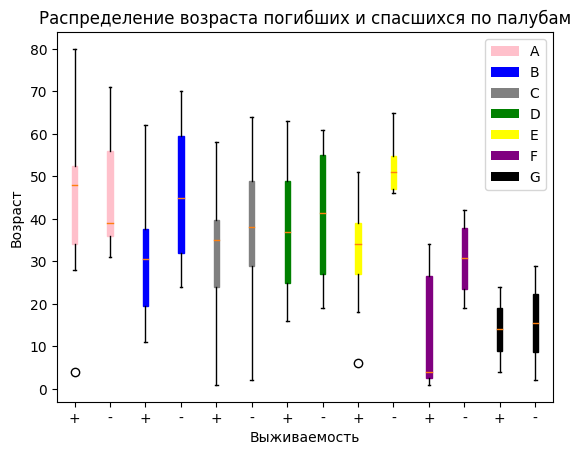

In [97]:
survived = data[data['survived'] == 1]
not_survived = data[data['survived'] == 0]

fig, ax = plt.subplots()

colors = ["pink", "blue", "gray", "green", "yellow", "purple", "black"]
decks = sorted(data['deck'].dropna().unique())

for i, deck in enumerate(decks):

    deck_survived = survived[survived['deck'] == deck]['age'].dropna()
    deck_not_survived = not_survived[not_survived['deck'] == deck]['age'].dropna()

    ax.boxplot([deck_survived, deck_not_survived], 
                labels=['+', '-'], 
                positions=[i*2+2.5, i*2+3.5], 
                patch_artist=True, 
                boxprops=dict(facecolor=colors[i], color=colors[i]))
    

ax.set_title('Распределение возраста погибших и спасшихся по палубам')
ax.set_xlabel('Выживаемость')
ax.set_ylabel('Возраст')

ax.legend([plt.Rectangle((0,0), 1, 1, fc=colors[i]) for i in range(len(decks))], decks)
plt.show()


2. Покажите распределение цены за билет у погибших и спасшихся пассажиров из каждого города.

In [ ]:
# PUT YOUR CODE HERE

3. Покажите на графике, сколько детей из каждого города отмечено в датасете. 

In [ ]:
# PUT YOUR CODE HERE

4. На диаграмме с группировкой покажите, к каким возрастным группам принадлежат пассажиры из каждого города? Возрастной группой считаем каждые десять лет: 0-10, 11-20, 21-30 и т.д.

In [ ]:
# PUT YOUR CODE HERE

5. На круговой диаграмме с группировкой покажите, как распределилось число поигбших среди женщин и детей с каждой палубы.

In [ ]:
# PUT YOUR CODE HERE